In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('casestudy_data.csv')

# Check data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513863 entries, 0 to 513862
Data columns (total 20 columns):
visit_id                                513863 non-null int64
date_time                               513863 non-null object
experience                              513863 non-null object
success                                 513863 non-null int64
zipcode                                 513096 non-null object
pro                                     513863 non-null int64
repeat_visit                            513863 non-null int64
days_since_last_visit                   406028 non-null object
new_movers                              513863 non-null int64
year_home_built                         501901 non-null float64
home_market_value                       501901 non-null float64
length_of_residence                     501901 non-null float64
net_worth                               501901 non-null float64
income                                  501901 non-null float64
mkt_org

In [4]:
df.describe(include='all')

,visit_id,date_time,experience,success,zipcode,pro,repeat_visit,days_since_last_visit,new_movers,year_home_built,home_market_value,length_of_residence,net_worth,income,mkt_organic_product_purchasers_value,mkt_trend_env_focused_hh_value,high_end_shoppers_value,do_it_yourselfer_value,montrd_home_security_sys_own_value,mkt_green_product_purchasers_value
count,513863.000000,513863,513863,513863.000000,513096,513863.000000,513863.000000,406028,513863.000000,501901.000000,501901.000000,501901.000000,501901.000000,501901.000000,501901.000000,501901.000000,501901.000000,501901.000000,501901.000000,501901.000000
unique,NaN,43182,2,NaN,15038,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,6/24/19 13:23,version2,NaN,30080,NaN,NaN,less than 1 day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,51,257284,NaN,17902,NaN,NaN,230358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,256931.000000,NaN,NaN,0.049723,NaN,0.179215,0.810502,NaN,0.324478,1980.672015,343.195915,11.004557,288908.644334,100913.018703,38.220549,31.381515,31.239370,46.192526,30.515315,44.994419
std,148339.615026,NaN,NaN,0.217373,NaN,0.383533,0.391904,NaN,0.468180,13.098487,150.487620,2.963374,165392.368511,28175.240365,13.052736,13.952084,10.195232,12.655106,8.972722,10.438021
min,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,4.000000,0.250000,12500.000000,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,128465.500000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,1973.000000,239.000000,8.000000,150000.000000,75000.000000,29.000000,21.000000,25.000000,38.000000,25.000000,38.000000
50%,256931.000000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,1984.000000,310.000000,13.000000,250000.000000,100000.000000,36.000000,30.000000,30.000000,47.000000,29.000000,46.000000
75%,385396.500000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,1.000000,1989.000000,413.000000,13.000000,250000.000000,125000.000000,46.000000,40.000000,37.000000,55.000000,35.000000,51.000000


### Check missing value

In [5]:
df.apply(lambda x: x.isna().sum(), axis=0)

visit_id                                     0
date_time                                    0
experience                                   0
success                                      0
zipcode                                    767
pro                                          0
repeat_visit                                 0
days_since_last_visit                   107835
new_movers                                   0
year_home_built                          11962
home_market_value                        11962
length_of_residence                      11962
net_worth                                11962
income                                   11962
mkt_organic_product_purchasers_value     11962
mkt_trend_env_focused_hh_value           11962
high_end_shoppers_value                  11962
do_it_yourselfer_value                   11962
montrd_home_security_sys_own_value       11962
mkt_green_product_purchasers_value       11962
dtype: int64

Several features related to the house seems to be missing at the same time, check it on the overall dataset.

In [6]:
df.loc[~df.year_home_built.isna(), :].apply(lambda x: x.isna()).sum(axis=0)

visit_id                                     0
date_time                                    0
experience                                   0
success                                      0
zipcode                                      0
pro                                          0
repeat_visit                                 0
days_since_last_visit                   105699
new_movers                                   0
year_home_built                              0
home_market_value                            0
length_of_residence                          0
net_worth                                    0
income                                       0
mkt_organic_product_purchasers_value         0
mkt_trend_env_focused_hh_value               0
high_end_shoppers_value                      0
do_it_yourselfer_value                       0
montrd_home_security_sys_own_value           0
mkt_green_product_purchasers_value           0
dtype: int64

In [7]:
df = df.loc[~df.year_home_built.isna(), :]

days_since_last_visit seems to have a lot of missing values (107k). Checking

In [8]:
df.days_since_last_visit.value_counts()

less than 1 day      224671
less than 7 days      94780
first visit           54268
more than 7 days      21022
more than 30 days      1380
more than a year         81
Name: days_since_last_visit, dtype: int64

In [9]:
df.days_since_last_visit = df.days_since_last_visit.fillna('unknown')

Label missing values as unknown

### Check numeric value anomalies

In [10]:
df.loc[df.year_home_built < 1900, :]

,visit_id,date_time,experience,success,zipcode,pro,repeat_visit,days_since_last_visit,new_movers,year_home_built,home_market_value,length_of_residence,net_worth,income,mkt_organic_product_purchasers_value,mkt_trend_env_focused_hh_value,high_end_shoppers_value,do_it_yourselfer_value,montrd_home_security_sys_own_value,mkt_green_product_purchasers_value
289868,115337,6/20/19 18:53,version1,0,85147,0,0,unknown,0,0.0,172.0,4.0,12500.0,50000.0,36.0,46.0,51.0,55.0,24.0,33.0


In [11]:
df = df.loc[df.year_home_built > 1900, :]

In [12]:
df.loc[df.zipcode.apply(lambda x: len(x) < 5 ), :]

,visit_id,date_time,experience,success,zipcode,pro,repeat_visit,days_since_last_visit,new_movers,year_home_built,home_market_value,length_of_residence,net_worth,income,mkt_organic_product_purchasers_value,mkt_trend_env_focused_hh_value,high_end_shoppers_value,do_it_yourselfer_value,montrd_home_security_sys_own_value,mkt_green_product_purchasers_value
9,108770,5/31/19 10:38,version2,0,1886,0,0,unknown,0,1979.0,497.0,13.0,500000.0,150000.0,32.0,13.0,20.0,46.0,38.0,51.0
23,244107,5/31/19 10:39,version2,0,2109,0,0,unknown,0,1964.0,364.0,8.0,250000.0,125000.0,33.0,25.0,25.0,43.0,40.0,46.0
51,416268,5/31/19 10:43,version2,0,4609,0,0,unknown,0,1988.0,326.0,18.0,250000.0,100000.0,40.0,21.0,29.0,45.0,48.0,39.0
53,477568,5/31/19 10:43,version2,0,1757,0,0,unknown,0,1978.0,389.0,13.0,250000.0,150000.0,50.0,28.0,29.0,38.0,34.0,61.0
57,378251,5/31/19 10:43,version1,0,6450,0,0,unknown,0,1965.0,275.0,13.0,250000.0,100000.0,36.0,30.0,31.0,33.0,34.0,59.0
61,115864,5/31/19 10:44,version1,0,7748,0,0,unknown,1,1963.0,471.0,13.0,500000.0,125000.0,46.0,32.0,30.0,45.0,24.0,52.0
74,16777,5/31/19 10:46,version2,0,926,0,1,first visit,0,1984.0,304.0,8.0,250000.0,75000.0,33.0,29.0,32.0,46.0,30.0,46.0
106,397666,5/31/19 10:49,version2,0,7840,0,0,unknown,0,1980.0,413.0,13.0,500000.0,125000.0,46.0,32.0,36.0,41.0,31.0,58.0
131,351980,5/31/19 10:51,version2,1,8854,1,0,unknown,0,1971.0,413.0,13.0,500000.0,125000.0,32.0,32.0,25.0,50.0,31.0,53.0
133,442502,5/31/19 10:52,version2,1,1970,0,1,less than 1 day,0,1953.0,368.0,13.0,250000.0,100000.0,28.0,22.0,25.0,44.0,45.0,43.0


Zipcode missing one digit, possiblily some leading 0 missing when data is stored.

# Evaluate two versions using MAB
## Simple MAB

Simple MAB with only visit_id, date_time, experience and success.

In [13]:
df_simple = df[['visit_id', 'date_time', 'experience', 'success']]

In [14]:
df_simple.tail()

,visit_id,date_time,experience,success
513858,382921,6/30/19 23:59,version2,0
513859,186356,6/30/19 23:59,version1,0
513860,355431,6/30/19 23:59,version1,0
513861,480424,6/30/19 23:59,version1,0
513862,454425,6/30/19 23:59,version1,0


In [15]:
df_simple.experience.unique()

array(['version1', 'version2'], dtype=object)

In [16]:
arms = [ df_simple.loc[df_simple.experience == v, :].sort_values('date_time').reset_index(drop=True)
        for v in df_simple.experience.unique() ]

In [17]:
arms[0].head()

,visit_id,date_time,experience,success
0,14167,5/31/19 10:36,version1,0
1,195581,5/31/19 10:37,version1,0
2,278496,5/31/19 10:37,version1,0
3,246436,5/31/19 10:37,version1,0
4,449258,5/31/19 10:38,version1,0


In [31]:
arms[0].success.mean()

0.04988360624972549

In [18]:
arms[1].head()

,visit_id,date_time,experience,success
0,451142,5/31/19 10:37,version2,0
1,316757,5/31/19 10:37,version2,0
2,486252,5/31/19 10:37,version2,1
3,121996,5/31/19 10:37,version2,0
4,363058,5/31/19 10:37,version2,0


In [32]:
arms[1].success.mean()

0.04943844355005488

In [25]:
from bandits import Bandit
from policy import EpsilonGreedyPolicy
from agent import Agent

In [38]:
epsilon = 0.1
bandit = Bandit(2, arms, batch_size=500)
policy = EpsilonGreedyPolicy(epsilon)
agent = Agent(bandit, policy)

In [39]:
reward_history = []
action_history = []
while not bandit.done:
    action = agent.choose()
    reward = bandit.pull(action)
    reward_history.append(reward)
    action_history.append(action)

In [40]:
import matplotlib.pyplot as plt

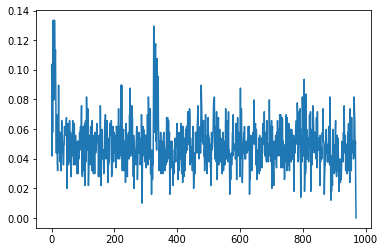

In [41]:
plt.plot(reward_history)

In [42]:
action_history = [ x if x==1 else -1 for x in action_history]

In [43]:
ah = pd.Series(action_history).cumsum()

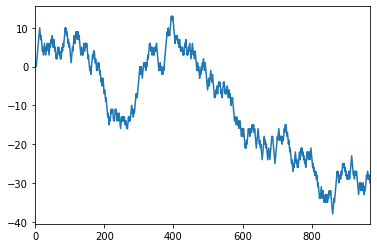

In [44]:
ah.plot()